## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0724 16:43:32.172458 10532 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0724 16:43:32.173456 10532 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0724 16:43:32.187418 10532 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 16:43:32.187418 10532 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 16:43:32.189419 10532 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.8258 - acc: 0.3465 - val_loss: 1.7036 - val_acc: 0.3941
Epoch 2/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.6054 - acc: 0.4321 - val_loss: 1.6708 - val_acc: 0.3989
Epoch 3/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5141 - acc: 0.4630 - val_loss: 1.6346 - val_acc: 0.4182
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.4566 - acc: 0.4828 - val_loss: 1.4959 - val_acc: 0.4647
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4046 - acc: 0.5018 - val_loss: 1.4878 - val_acc: 0.4728
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.3650 - acc: 0.5176 - val_loss: 1.4583 - val_acc: 0.4765
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3253 - acc: 0.5313 - val_loss: 1.5178 - val_acc

50000/50000 [==============================] - 5s 91us/step - loss: 1.8115 - acc: 0.3606 - val_loss: 1.7667 - val_acc: 0.3772
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7328 - acc: 0.3901 - val_loss: 1.6993 - val_acc: 0.3997
Epoch 4/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6734 - acc: 0.4112 - val_loss: 1.6519 - val_acc: 0.4189
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6264 - acc: 0.4279 - val_loss: 1.6175 - val_acc: 0.4305
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5841 - acc: 0.4430 - val_loss: 1.5701 - val_acc: 0.44404 - acc: 0.
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5485 - acc: 0.4550 - val_loss: 1.5569 - val_acc: 0.4513
Epoch 8/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5199 - acc: 0.4636 - val_loss: 1.5222 - val_acc: 0.4629
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 4s 84us/step - loss: 2.0359 - acc: 0.2786 - val_loss: 2.0079 - val_acc: 0.2947
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9860 - acc: 0.3008 - val_loss: 1.9640 - val_acc: 0.3127
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.9477 - acc: 0.3162 - val_loss: 1.9303 - val_acc: 0.3272
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9168 - acc: 0.3302 - val_loss: 1.9026 - val_acc: 0.3365
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8911 - acc: 0.3416 - val_loss: 1.8791 - val_acc: 0.3489
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8691 - acc: 0.3510 - val_loss: 1.8595 - val_acc: 0.3472
Epoch 9/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8508 - acc: 0.3561 - val_loss: 1.8426 - val_acc: 0.3620
Epoch 10/50
50000/50000 [===========================

Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.2287 - acc: 0.1988 - val_loss: 2.2207 - val_acc: 0.2084
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.2123 - acc: 0.2143 - val_loss: 2.2050 - val_acc: 0.2219
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.1969 - acc: 0.2247 - val_loss: 2.1903 - val_acc: 0.2328
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.1824 - acc: 0.2350 - val_loss: 2.1766 - val_acc: 0.2410
Epoch 9/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1689 - acc: 0.2423 - val_loss: 2.1638 - val_acc: 0.2473
Epoch 10/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.1563 - acc: 0.2486 - val_loss: 2.1520 - val_acc: 0.2537 0s - loss: 2.1577
Epoch 11/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.1446 - acc: 0.2539 - val_loss: 2.1408 - val_acc: 0.2593
Epoch 12/50
50000/500

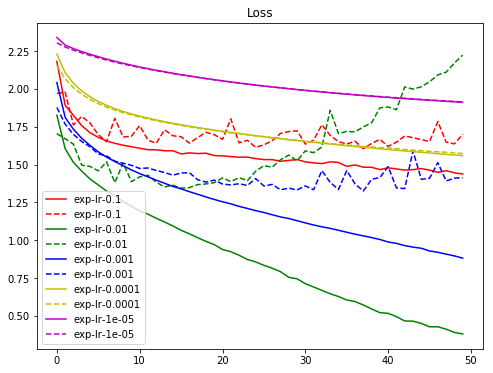

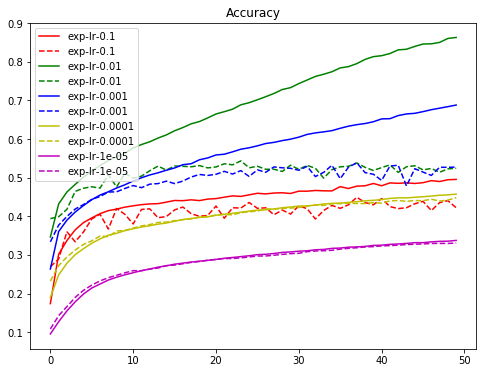

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()